In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_excel("online_retail_II.xlsx")

In [94]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [5]:
df.shape

(525461, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [8]:
df['Description'].nunique()

4681

In [9]:
df['Customer ID'].nunique()

4383

In [10]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [11]:
df.describe(include = 'O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [12]:
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

In [13]:
df[df['Country']=='Channel Islands']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9628,490145,22130,PARTY CONE CHRISTMAS DECORATION,24,2009-12-04 09:27:00,0.85,14564.00,Channel Islands
9629,490145,22218,CAKE STAND LACE WHITE,6,2009-12-04 09:27:00,4.25,14564.00,Channel Islands
9630,490145,22222,CAKE PLATE LOVEBIRD WHITE,6,2009-12-04 09:27:00,4.95,14564.00,Channel Islands
9631,490145,22220,CAKE STAND LOVEBIRD 2 TIER WHITE,4,2009-12-04 09:27:00,9.95,14564.00,Channel Islands
9632,490145,22215,CAKE STAND WHITE TWO TIER LACE,4,2009-12-04 09:27:00,8.50,14564.00,Channel Islands
...,...,...,...,...,...,...,...,...
522950,538002,22510,GINGHAM BABUSHKA DOORSTOP,4,2010-12-09 11:48:00,3.75,14932.00,Channel Islands
522951,538002,21116,OWL DOORSTOP,3,2010-12-09 11:48:00,4.95,14932.00,Channel Islands
522952,538002,22688,DOORMAT PEACE ON EARTH BLUE,2,2010-12-09 11:48:00,7.95,14932.00,Channel Islands
522953,538002,48138,DOORMAT UNION FLAG,2,2010-12-09 11:48:00,7.95,14932.00,Channel Islands


### Checking the outliers in Price and Quantity

<Axes: ylabel='Price'>

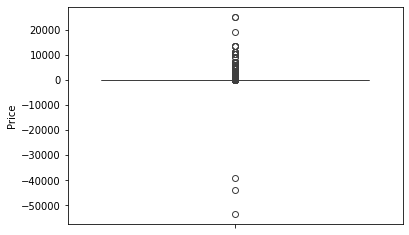

In [14]:
sns.boxplot(df['Price'])

<Axes: ylabel='Quantity'>

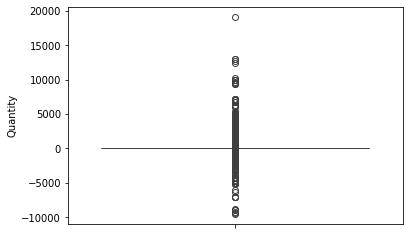

In [15]:
sns.boxplot(df['Quantity'])

In [16]:
df[df['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom
525235,538162,46000M,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


### Data Documentation:

**InvoiceNo:** Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
**StockCode:** Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
**Description:** Product (item) name. Nominal. 
**Quantity:** The quantities of each product (item) per transaction. Numeric.	
**InvoiceDate:** Invice date and time. Numeric. The day and time when a transaction was generated. 
**UnitPrice:** Unit price. Numeric. Product price per unit in sterling (Â£). 
**CustomerID:** Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 
**Country:** Country name. Nominal. The name of the country where a customer resides.

### Usually Invoice is a 6 digit number however there are some characters too.


In [17]:
df['Invoice']= df['Invoice'].astype('str')

### Checking the records which have more than 6 digits

In [18]:
df[df['Invoice'].str.match('^\\d{6}$')== False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


### Based on the data documentation invoices with C are the return orders

In [19]:
df['Invoice'].str.replace('[0-9]','',regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [20]:
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


### Checking StockCode

In [21]:
df['StockCode'] = df['StockCode'].astype('str')

In [22]:
df[df['StockCode'].str.match('^\\d{5}$')==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


In [23]:
df[(df['StockCode'].str.match('^\\d{5}$')==False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')==False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.00,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [24]:
df[(df['StockCode'].str.match('^\\d{5}$')==False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')==False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [25]:
df[df['StockCode'].str.contains('^DOT')] ## No Customer ID

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [26]:
df[df['StockCode'].str.contains('^D$')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.00,United Kingdom
24675,C491428,D,Discount,-1,2009-12-10 20:23:00,9.10,15494.00,United Kingdom
29414,C491845,D,Discount,-1,2009-12-14 14:54:00,1.59,NaN,United Kingdom
29958,C491962,D,Discount,-1,2009-12-14 16:38:00,0.59,13206.00,United Kingdom
...,...,...,...,...,...,...,...,...
501237,536158,D,Discount,1,2010-11-30 11:57:00,32.29,13634.00,United Kingdom
503073,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
511955,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.00,United Kingdom
517436,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.00,United Kingdom


In [27]:
df[df['StockCode'].str.contains('^DCGS0058$')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
17264,490745,DCGS0058,MISO PRETTY GUM,1,2009-12-07 18:02:00,0.83,NaN,United Kingdom
30671,491969,DCGS0058,MISO PRETTY GUM,1,2009-12-14 17:57:00,0.83,NaN,United Kingdom
31652,491970,DCGS0058,MISO PRETTY GUM,1,2009-12-14 18:03:00,0.83,NaN,United Kingdom
32045,491971,DCGS0058,MISO PRETTY GUM,2,2009-12-14 18:37:00,0.83,NaN,United Kingdom
34668,492303,DCGS0058,MISO PRETTY GUM,1,2009-12-16 11:57:00,0.83,NaN,United Kingdom
37222,492425,DCGS0058,MISO PRETTY GUM,1,2009-12-16 17:58:00,0.83,NaN,United Kingdom
40878,492782,DCGS0058,MISO PRETTY GUM,1,2009-12-18 17:06:00,0.83,NaN,United Kingdom
41260,492783,DCGS0058,MISO PRETTY GUM,2,2009-12-18 17:15:00,0.83,NaN,United Kingdom


### Reviewing all the data records with different stockcodes. After reviewing most of the records were irrelevant and some doesnt have customer ID so dropping all those records. Only considering PADS which are legit for padding product.

## Data Cleaning

In [28]:
cleaned_df = df.copy()

In [29]:
cleaned_df.shape

(525461, 8)

In [30]:
cleaned_df.dropna(subset = 'Customer ID', inplace = True)

In [31]:
cleaned_df.shape

(417534, 8)

In [32]:
cleaned_df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [33]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')

mask = ( cleaned_df['Invoice'].str.match('^\\d{6}$')==True )

cleaned_df = cleaned_df[mask]

In [34]:
cleaned_df['StockCode'].astype('str')


mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)


cleaned_df = cleaned_df[mask]

In [35]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [36]:
cleaned_df = cleaned_df[cleaned_df['Price']>0.00]

In [37]:
cleaned_df[cleaned_df['Price']==0.001]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.00,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.00,15182.00,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.00,13765.00,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.00,14459.00,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.00,14857.00,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.00,12671.00,Germany


In [38]:
len(cleaned_df)/len(df)

0.7732429238325965

### So approx 23% of the data is dropped while data cleaning and now we have 77% of data

## Feature Engineering

In [39]:
cleaned_df['sale_amount'] = cleaned_df['Price']*cleaned_df['Quantity']

In [40]:
aggregated_df = cleaned_df.groupby(by = 'Customer ID', as_index = False)\
.agg(
    MonetaryValue = ('sale_amount','sum'),
    Frequency = ('Invoice','nunique'),
    LastInvoiceDate = ('InvoiceDate','max')
)

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [41]:
max_invoice_date = aggregated_df['LastInvoiceDate'].max()

aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days

In [98]:
min_invoice_date = aggregated_df['LastInvoiceDate'].min()
min_invoice_date

Timestamp('2009-12-01 10:49:00')

In [42]:
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


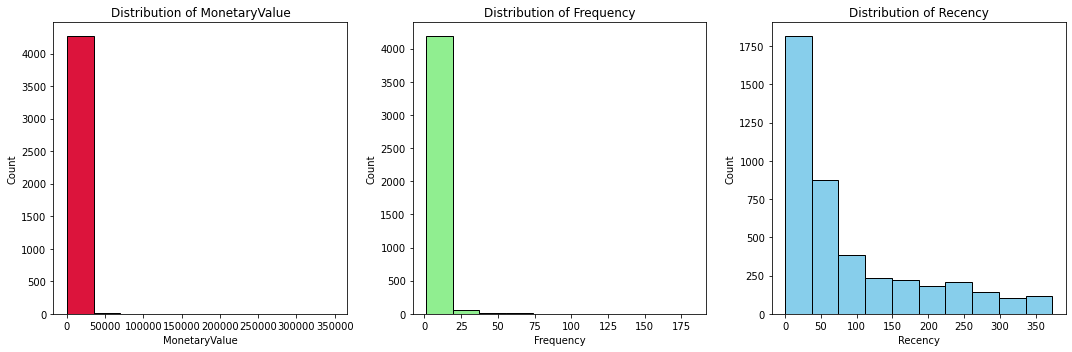

In [43]:
plt.figure(figsize = (15,5))


plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'], bins = 10, color = 'crimson', edgecolor = 'black')
plt.title('Distribution of MonetaryValue')
plt.xlabel('MonetaryValue')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'], bins = 10, color = 'lightgreen', edgecolor = 'black')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'], bins = 10, color = 'skyblue', edgecolor = 'black')
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

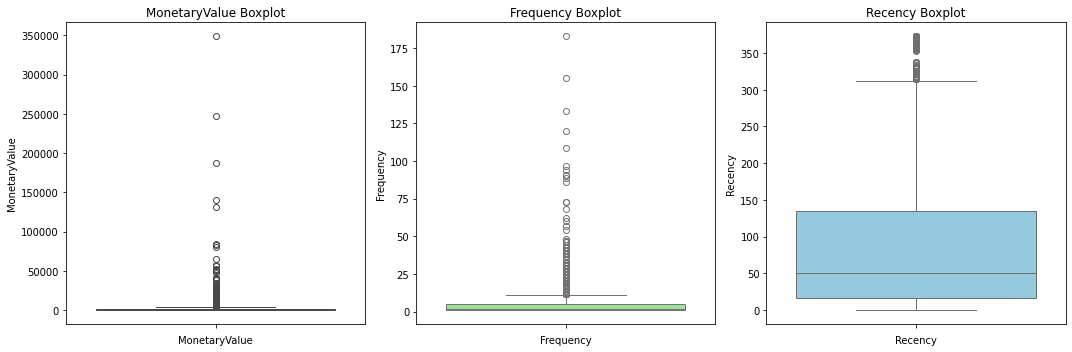

In [44]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(data = aggregated_df['MonetaryValue'], color = 'crimson')
plt.title('MonetaryValue Boxplot')
plt.xlabel('MonetaryValue')

plt.subplot(1,3,2)
sns.boxplot(data = aggregated_df['Frequency'], color = 'lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data = aggregated_df['Recency'], color = 'skyblue')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()


In [45]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df['MonetaryValue']> M_Q3+1.5*M_IQR) | (aggregated_df['MonetaryValue']< M_Q1-1.5*M_IQR)].copy()

In [46]:
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [47]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3-F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency']> F_Q3+1.5*F_IQR) | (aggregated_df['Frequency']< F_Q1-1.5*F_IQR)].copy()

In [48]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


In [49]:
non_outliers_df.shape

(3809, 5)

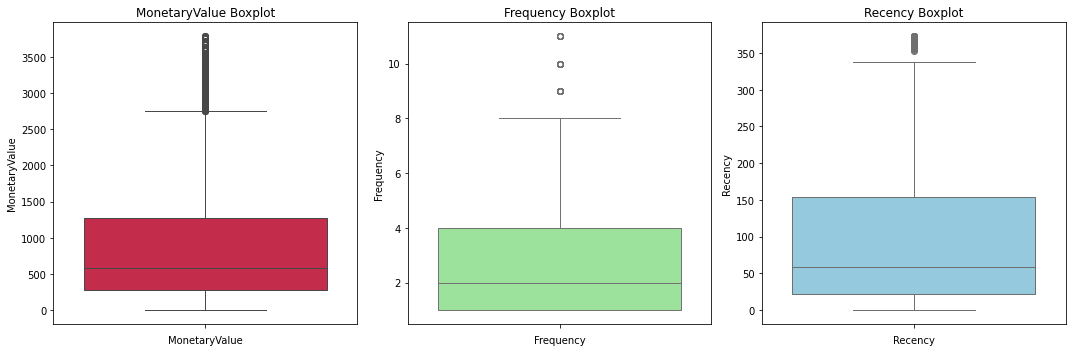

In [50]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(data = non_outliers_df['MonetaryValue'], color = 'crimson')
plt.title('MonetaryValue Boxplot')
plt.xlabel('MonetaryValue')

plt.subplot(1,3,2)
sns.boxplot(data = non_outliers_df['Frequency'], color = 'lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data = non_outliers_df['Recency'], color = 'skyblue')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()


In [51]:
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


### Variables are of different scale. As KMeans algorithm works on distances its better to bring all the variables into a standard scale

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue','Frequency','Recency']])

In [54]:
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [55]:
scaled_df = pd.DataFrame(scaled_data, index = non_outliers_df.index, columns = ('MonetaryValue','Frequency','Recency'))

In [56]:
scaled_df.head()

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89


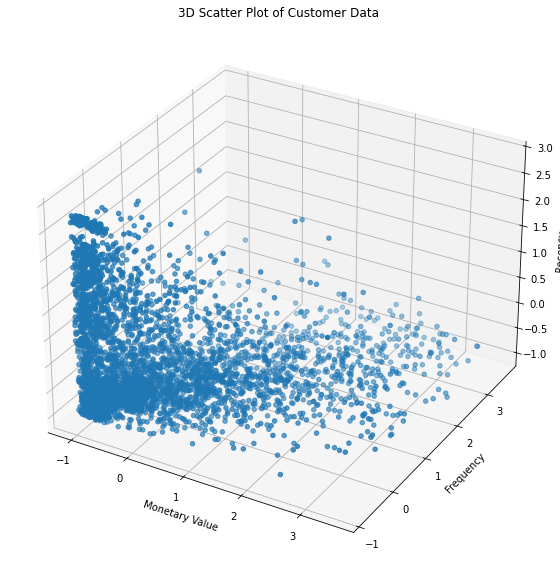

In [57]:
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(scaled_df['MonetaryValue'],scaled_df['Frequency'],scaled_df['Recency'])
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

## KMeans Clustering

In [58]:
max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_df)
    
    sil_scores = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(sil_scores)
    inertia.append(kmeans.inertia_)

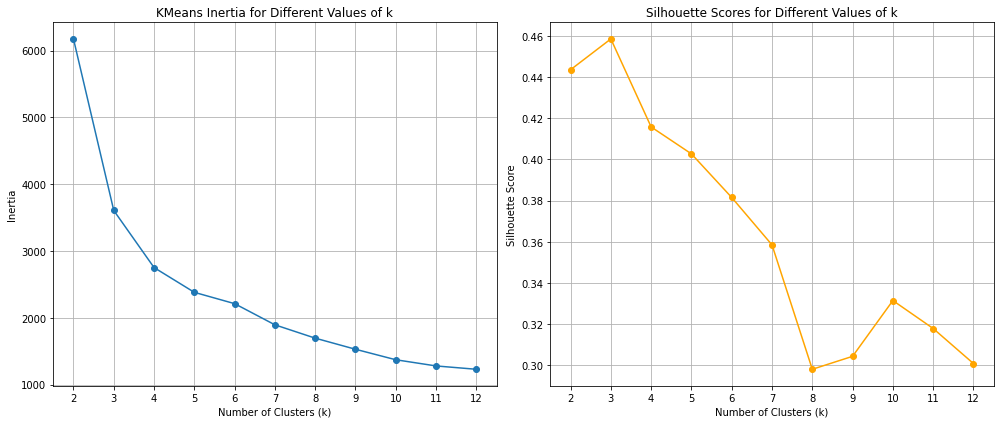

In [59]:
plt.figure(figsize = (14,6))


plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

From the elbow curve and silhoutte score we can see that it segmenting the data into 4 clusters is better.

In [63]:
kmeans = KMeans(n_clusters=4,max_iter = 1000,random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)
cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [66]:
non_outliers_df['cluster'] = cluster_labels

non_outliers_df

/var/folders/ky/rbn7zzqs4256llt1rhykp50r0000gn/T/ipykernel_87057/2998588342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['cluster'] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


In [68]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['cluster'].map(cluster_colors)

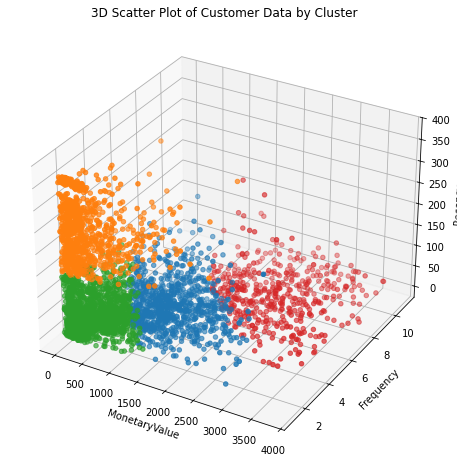

In [100]:
fig = plt.figure(figsize=(8,8))


ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'],non_outliers_df['Recency'],
                    c= colors,
                    marker = 'o')

ax.set_xlabel('MonetaryValue')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()


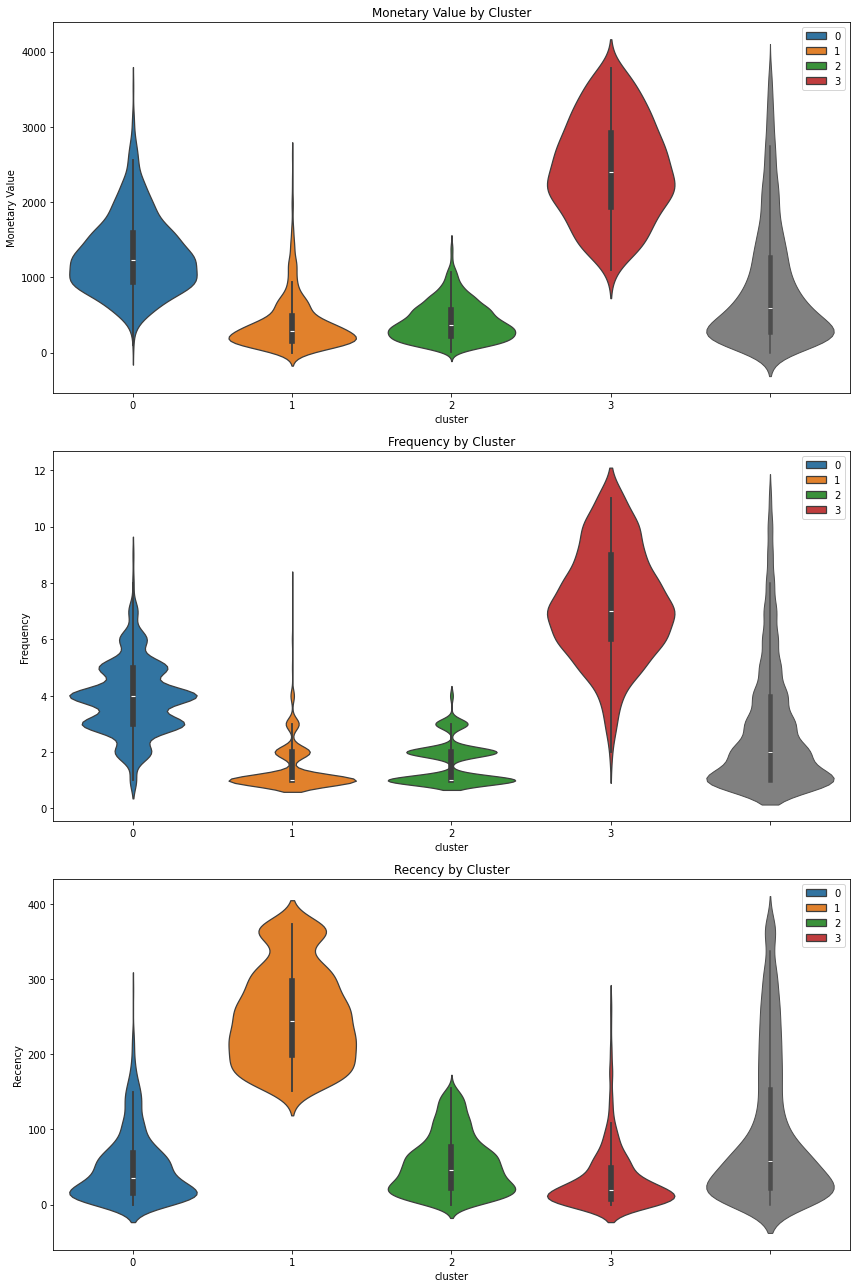

In [79]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

**Cluster 0(Blue): Retain (High-Value, Regular Customers)**

This group consists of valuable customers who make regular purchases, though their activity may not always be recent. They are crucial to your business, and retaining them should be a top priority. Focus on keeping their loyalty by offering personalized deals, loyalty rewards, and consistent communication to remind them why they value your brand.

**Cluster 1(Orange): Re-Engage(Low-Value, Lapsed Customers)**

These are customers who purchase infrequently and haven’t bought anything recently. While they represent a smaller value, they are an opportunity for growth. To bring them back, consider targeted re-engagement campaigns—like special discounts, email reminders, or exclusive offers. Think of creative ways to make your brand top-of-mind for them again.

**Cluster 2(Green): Nurture(New or Low-Value Recent Customers)**

This cluster includes customers who are relatively new or haven’t spent much yet but have made recent purchases. They’re just starting their journey with your brand, and with the right approach, they could become loyal buyers. Invest in nurturing this relationship by offering excellent customer service, tailored recommendations, and incentives that encourage repeat purchases.

**Cluster 3(Red): Reward (High-Value Loyal Customers)**

These are your most loyal and valuable customers who shop frequently and often. They are your biggest supporters and deserve recognition. Show them you appreciate their loyalty with robust rewards programs, early access to sales or new products, and exclusive offers. By continuing to make them feel valued, you can ensure they remain your brand advocates for the long term.

we can create tailored strategies to engage, nurture, and retain customers at every stage of their journeys.

In [83]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD"
}

non_outliers_df["ClusterLabel"] = non_outliers_df["cluster"].map(cluster_labels)

non_outliers_df

/var/folders/ky/rbn7zzqs4256llt1rhykp50r0000gn/T/ipykernel_87057/1782273370.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["ClusterLabel"] = non_outliers_df["cluster"].map(cluster_labels)


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0,RETAIN
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2,NURTURE
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1,RE-ENGAGE
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0,RETAIN


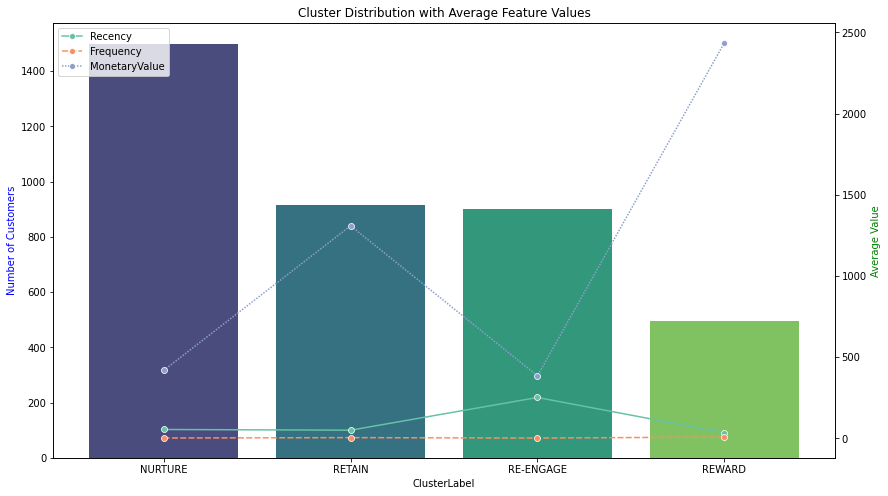

In [91]:
cluster_counts = non_outliers_df['ClusterLabel'].value_counts()
feature_means = non_outliers_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue']].mean()

fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()